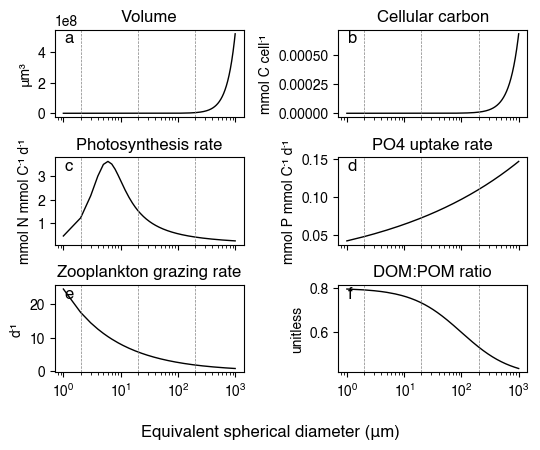

In [1]:
import matplotlib.pyplot as plt
import numpy as np

esd = np.arange(1, 1000) ## in um
## volume
volume = np.pi * esd**3 / 6 ## in um^3

## allometric rules to determine the carbon quota
quota_c = 1.45e-11 * volume ** 0.88 ## in mmol C/cell
quota_pmin = quota_c*0.0027022

# ── user‐defined parameters for DIC curve ──
vmaxDIC_a = 3.08
vmaxDIC_b = 5.00
vmaxDIC_c = -3.8
log_vol = np.log10(volume)
vmaxDIC = (vmaxDIC_a + log_vol) / (vmaxDIC_b
                                   + vmaxDIC_c * log_vol
                                   + log_vol**2)

gmax = 21.9 * volume**-0.16

vmax_P = 4.4E-2 *volume**0.06

beta_a = 0.8
beta_b = 0.4
beta_c = 100
beta = beta_a - (beta_a - beta_b)/(1+beta_c/esd)

plt.rcParams['font.family'] = 'Helvetica'
## plot
fig, axs = plt.subplots(3,2, tight_layout=True, figsize=(5.5, 4.5),
                       sharex=True)
ax = axs.flatten()

fig.supxlabel('Equivalent spherical diameter (μm)')
ax[0].plot(esd, volume, 'k-', linewidth=1)
ax[1].plot(esd, quota_c, 'k-', linewidth=1)
ax[2].plot(esd, vmaxDIC, 'k-', linewidth=1)
ax[3].plot(esd, vmax_P, 'k-', linewidth=1)
ax[4].plot(esd, gmax, 'k-', linewidth=1)
ax[5].plot(esd, beta, 'k-', linewidth=1)


ax[0].set_ylabel('μm³')
ax[1].set_ylabel('mmol C cell⁻¹')
ax[2].set_ylabel('mmol N mmol C⁻¹ d⁻¹')
ax[3].set_ylabel('mmol P mmol C⁻¹ d⁻¹')
ax[4].set_ylabel('d⁻¹')
ax[5].set_ylabel('unitless')

ax[0].set_title('Volume')
ax[1].set_title('Cellular carbon')
ax[2].set_title('Photosynthesis rate')
ax[3].set_title('PO4 uptake rate')
ax[4].set_title('Zooplankton grazing rate')
ax[5].set_title('DOM:POM ratio')

## add alphabetical labels
ax[0].text(0.05, 0.85, "a", transform=ax[0].transAxes, fontsize=12, fontweight="bold")
ax[1].text(0.05, 0.85, "b", transform=ax[1].transAxes, fontsize=12, fontweight="bold")
ax[2].text(0.05, 0.85, "c", transform=ax[2].transAxes, fontsize=12, fontweight="bold")
ax[3].text(0.05, 0.85, "d", transform=ax[3].transAxes, fontsize=12, fontweight="bold")
ax[4].text(0.05, 0.85, "e", transform=ax[4].transAxes, fontsize=12, fontweight="bold")
ax[5].text(0.05, 0.85, "f", transform=ax[5].transAxes, fontsize=12, fontweight="bold")

## add vertical grid lines at 2, 20, 200, 2000 μm
for i in range(6):
    ax[i].axvline(2, color='gray', linestyle='--', linewidth=0.5)
    ax[i].axvline(20, color='gray', linestyle='--', linewidth=0.5)
    ax[i].axvline(200, color='gray', linestyle='--', linewidth=0.5)

# show in log scale
for i in range(6):
    ax[i].set_xscale('log')

fig.savefig('../output/concept.png', dpi=300, bbox_inches='tight')